In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import networkx as nx
from itertools import count

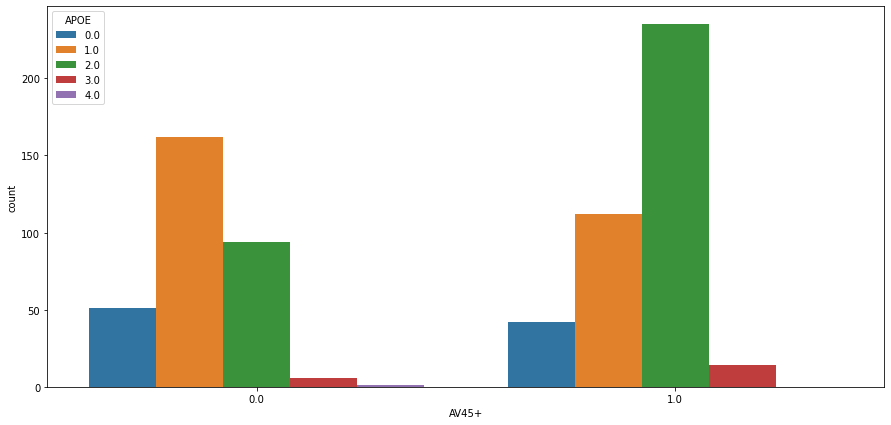

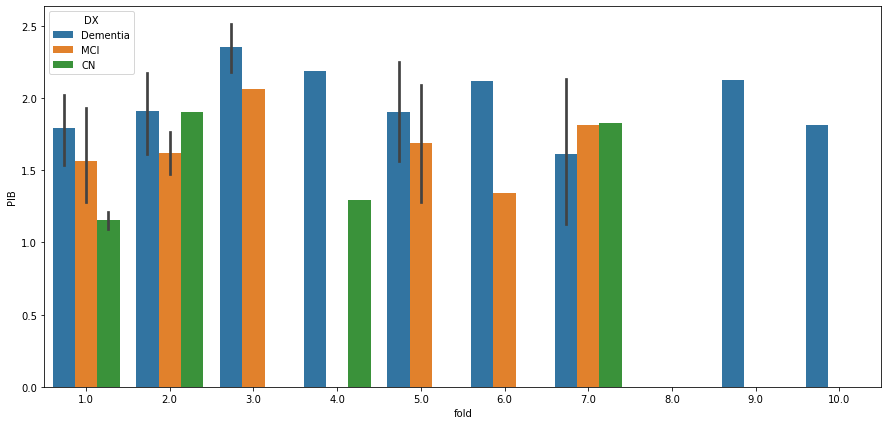

In [42]:
folds = []
for k in range(10):
    k+=1
    fold_data = pd.read_csv(f'data/splits/10Fold_CV_PET/fold{k}_val_samples.csv', index_col=0)
    fold_data['fold'] = k
    folds.append(fold_data)

all_folds = pd.concat(folds)

genetics = pd.read_csv('data/ADNI/AD_PPI_missense.csv', index_col=0)
genetics.index = genetics.index.rename('')
genetics = genetics.T
genetics_nozeroes = genetics.loc[:, (genetics != 0).any(axis=0)]
genes = genetics_nozeroes.columns.tolist()
# print(genetics_nozeroes.index)

data = pd.concat([all_folds, genetics_nozeroes], axis=1)
data

plt.figure(figsize=(15, 7))
sns.countplot(x='AV45+', hue='APOE', data=data)
plt.show()

plt.figure(figsize=(15, 7))
sns.barplot(x='fold', y='PIB', hue='DX', data=data)
plt.show()

# sns.countplot(x='fold', hue='AV45+', data=data)
# plt.show()

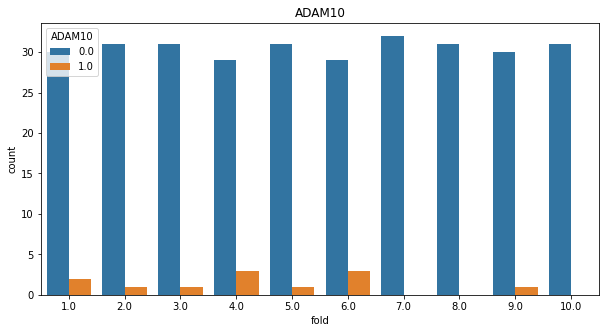

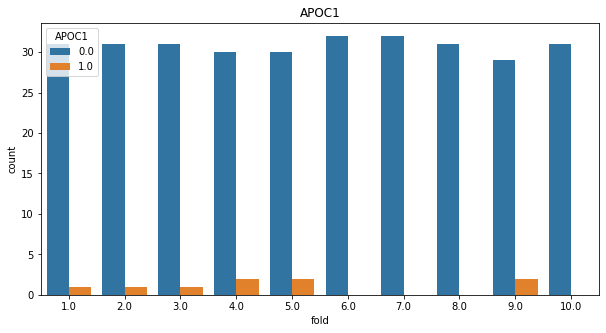

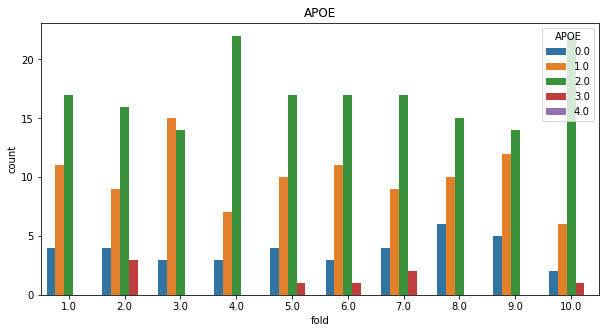

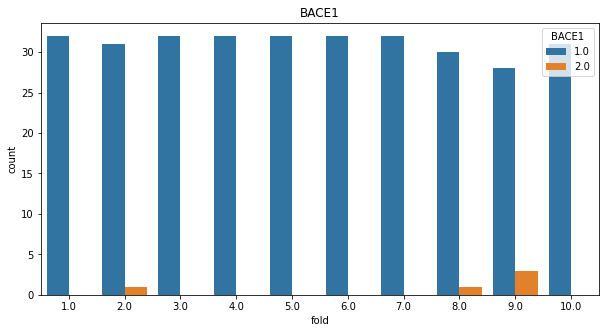

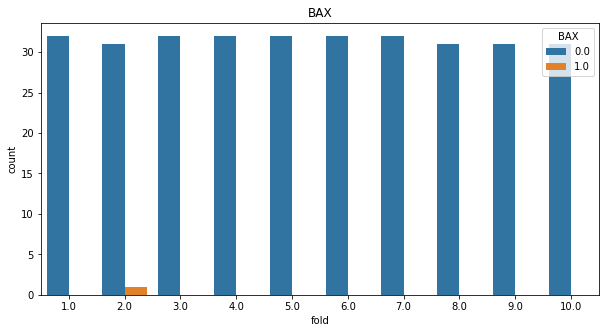

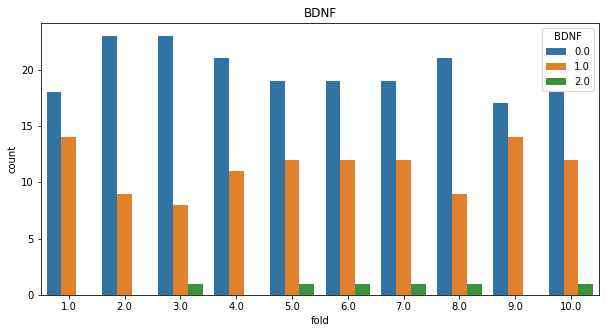

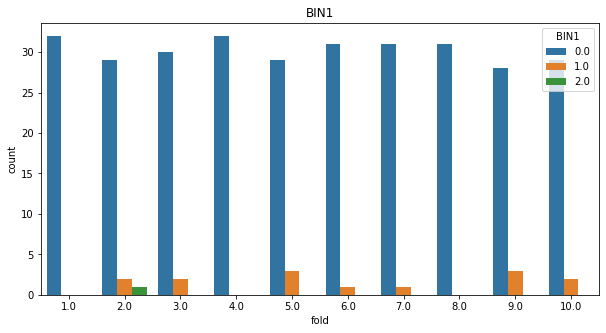

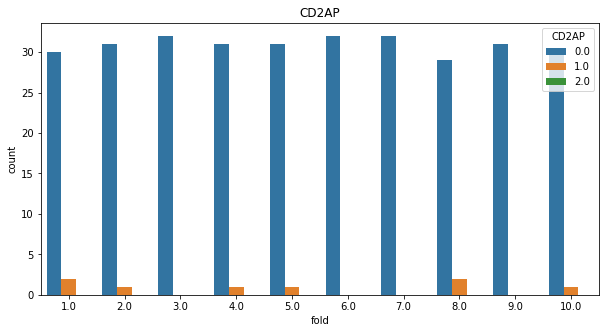

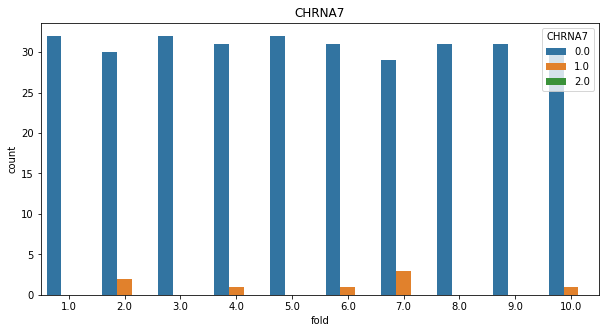

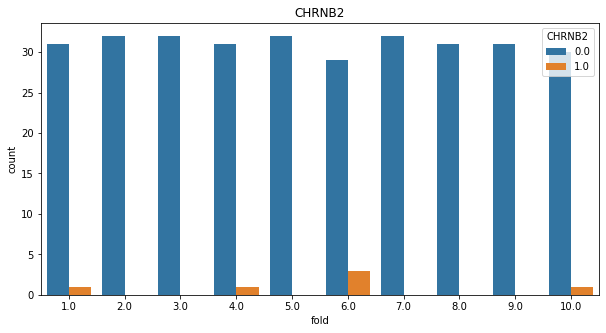

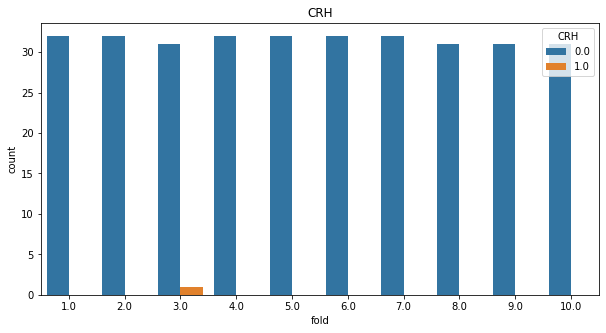

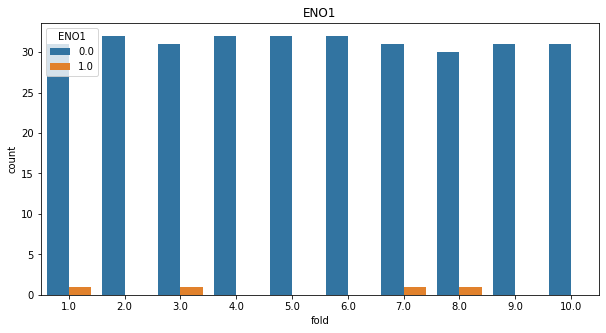

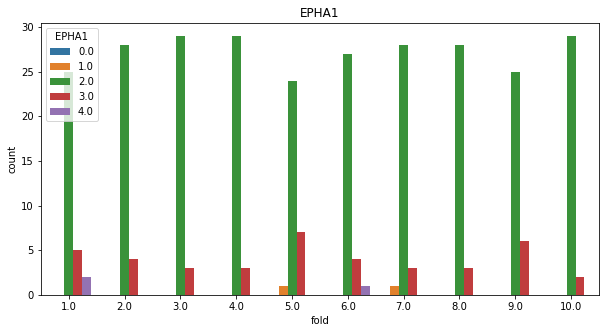

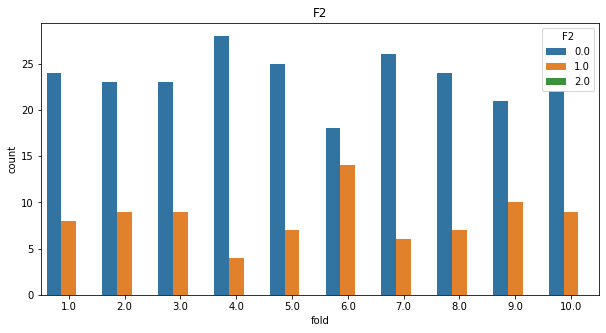

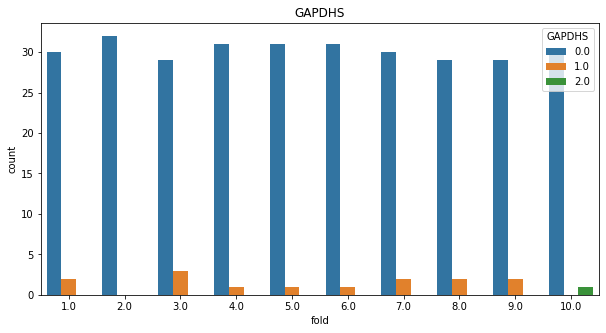

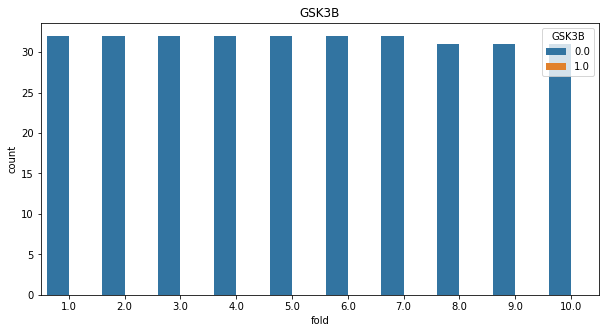

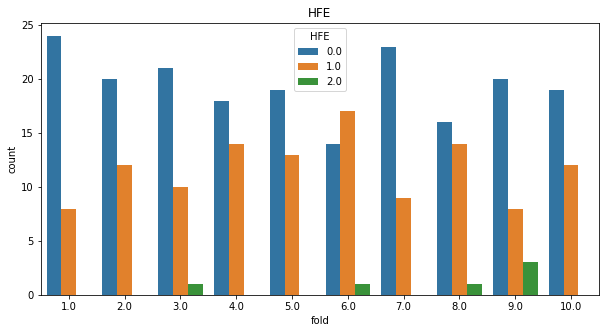

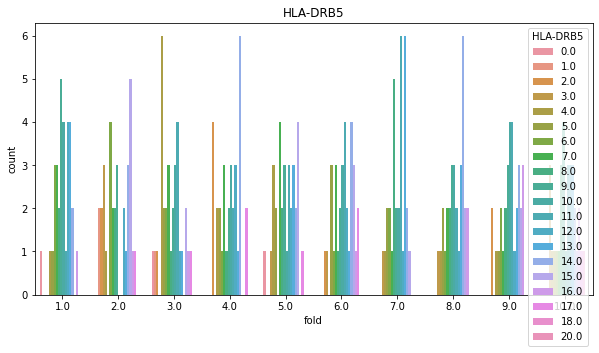

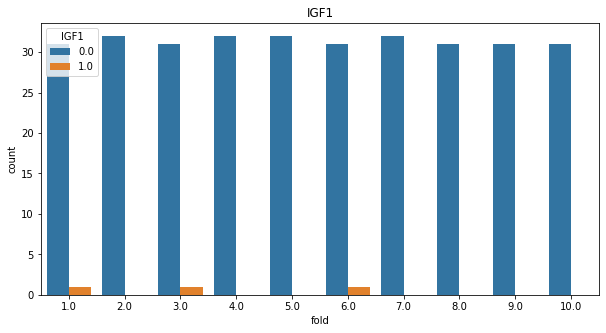

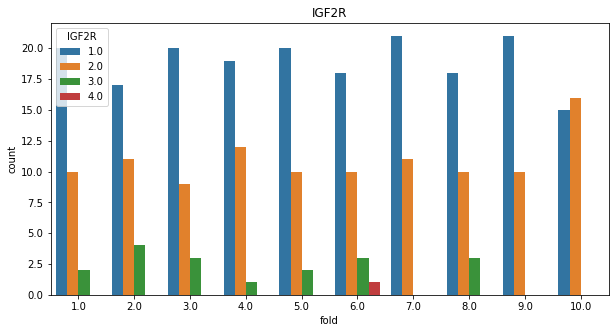

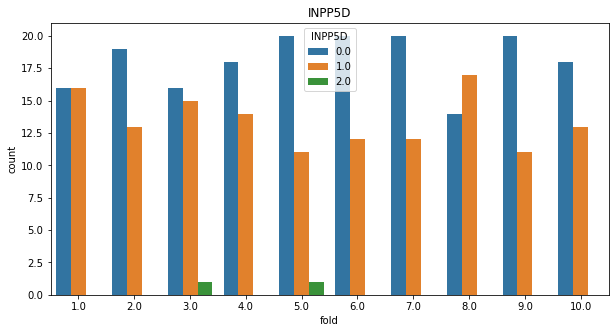

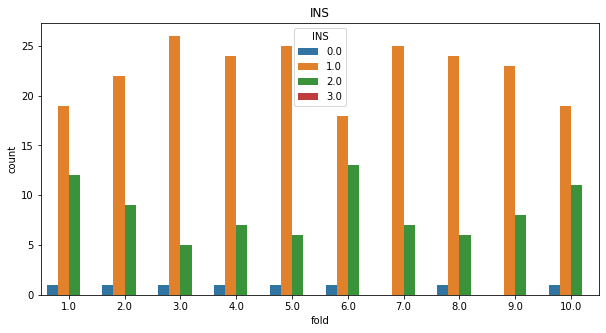

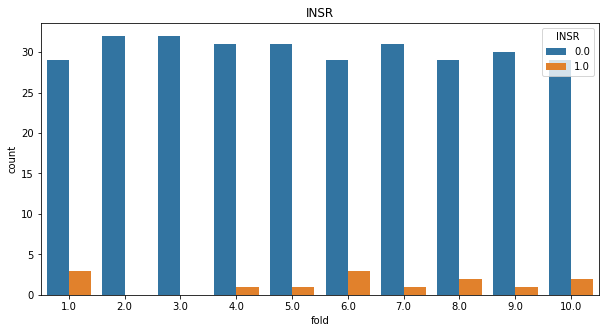

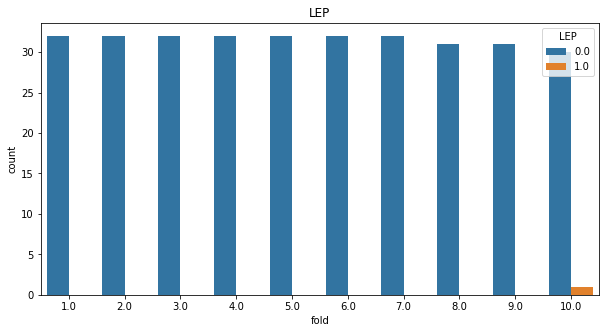

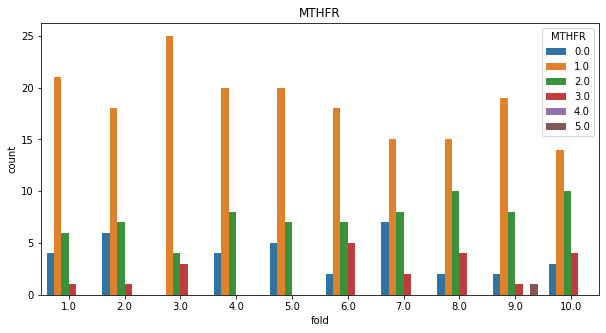

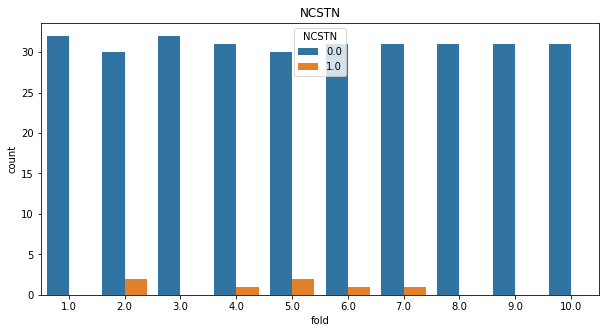

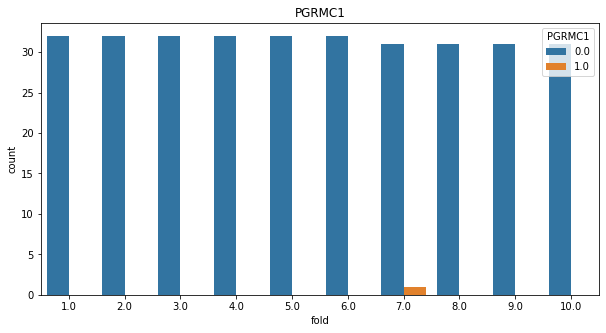

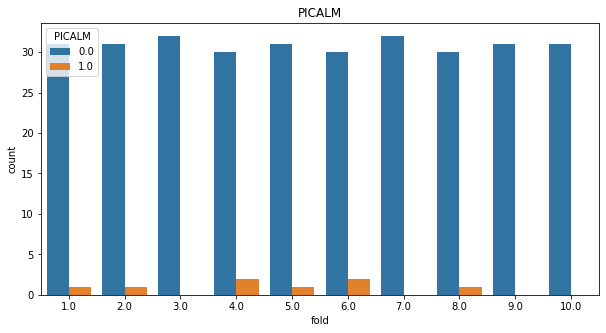

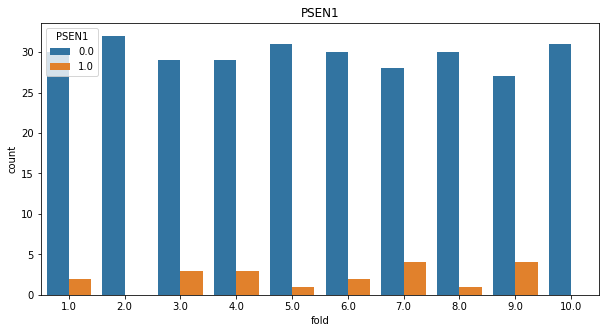

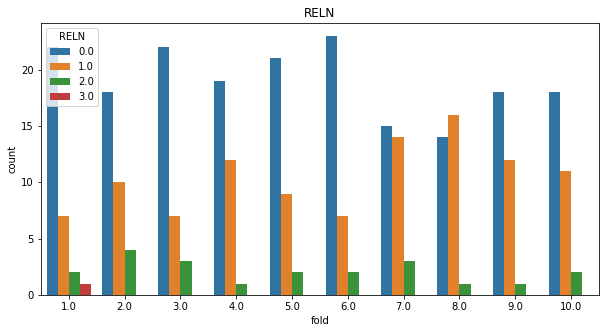

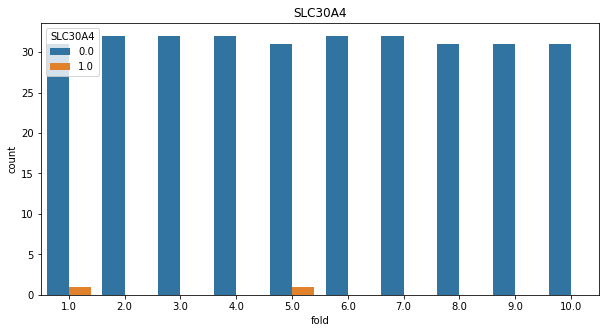

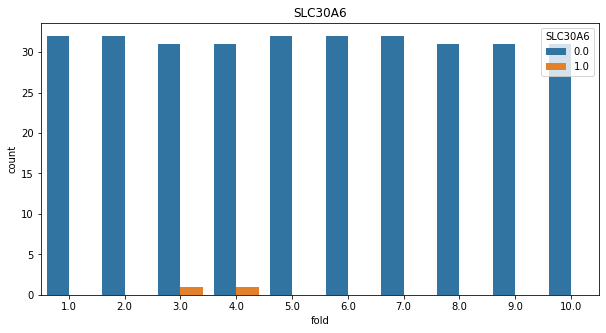

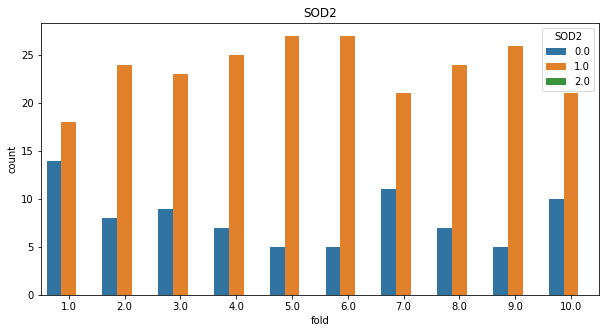

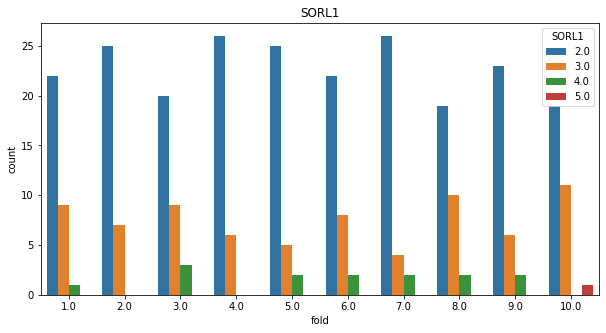

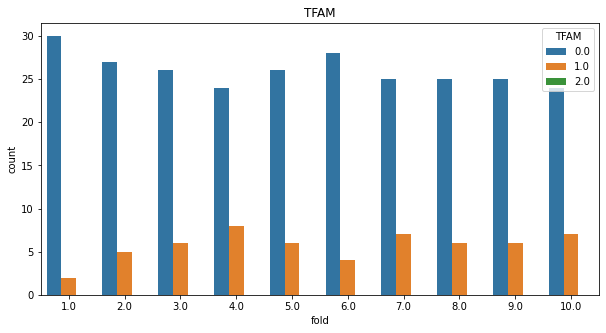

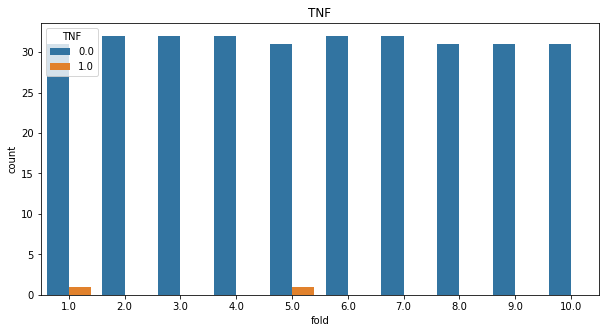

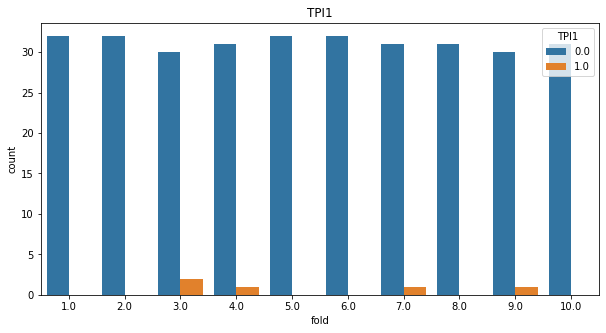

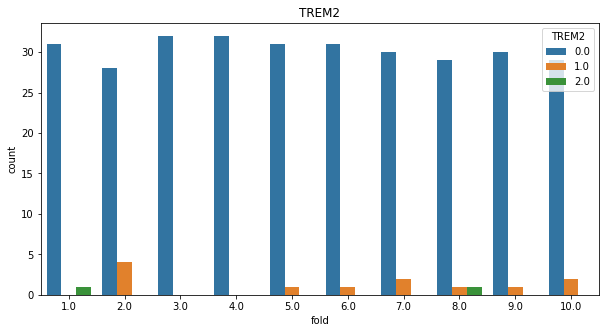

In [6]:
for gene in genes:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x='fold', hue=gene)
    plt.title(gene)
    plt.show()

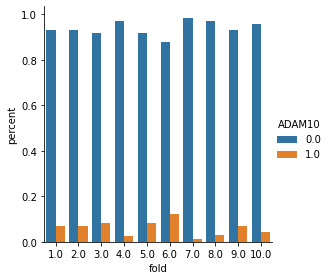

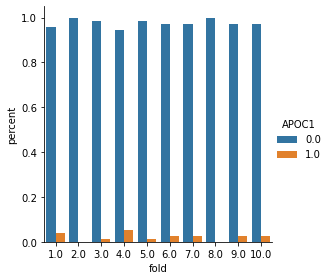

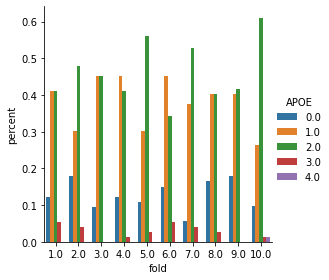

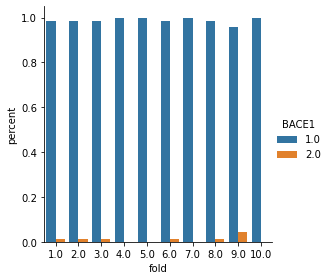

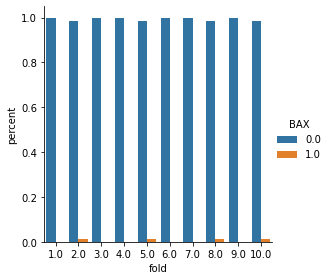

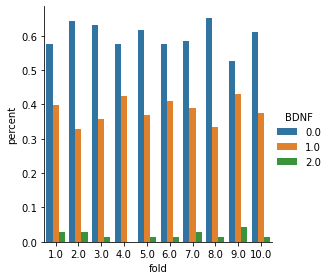

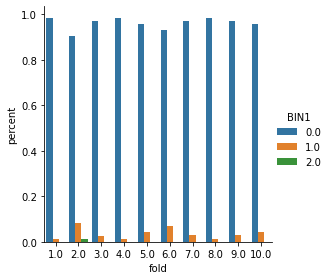

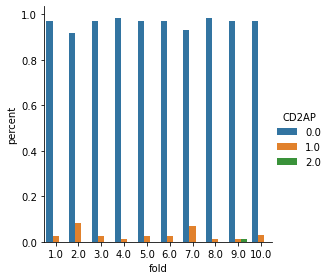

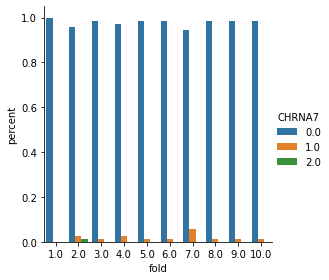

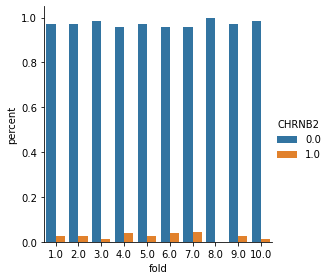

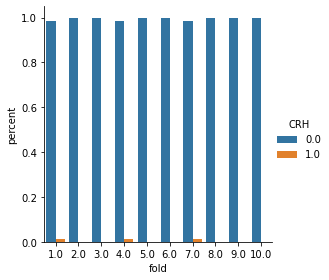

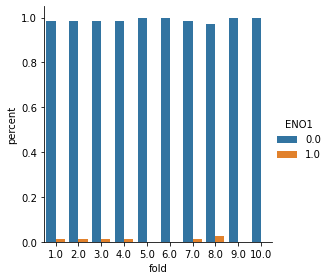

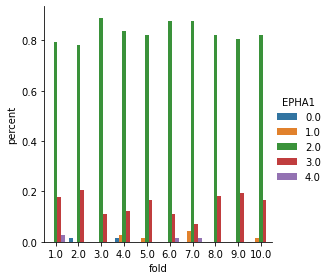

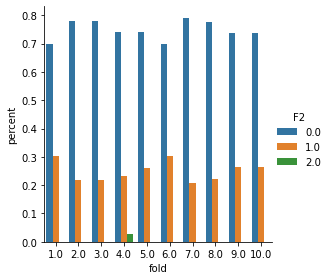

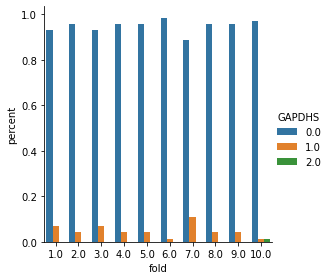

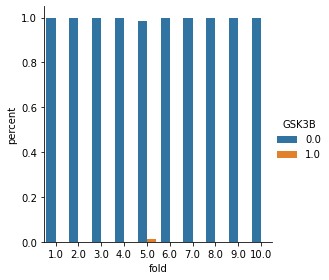

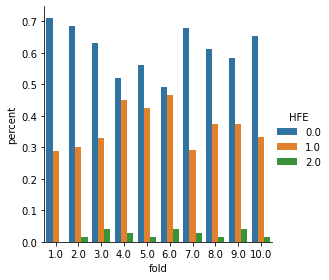

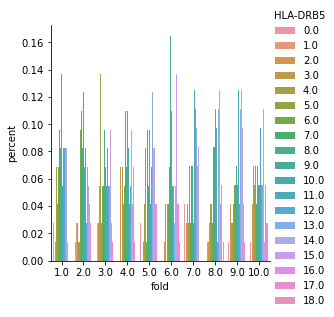

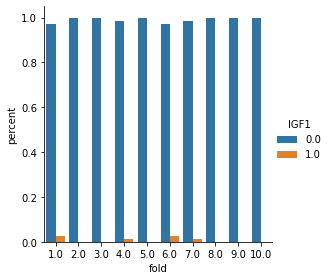

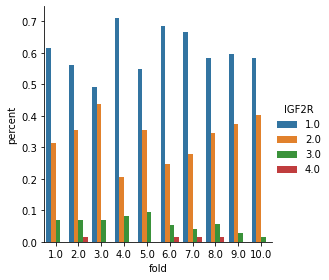

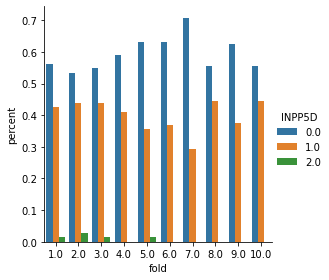

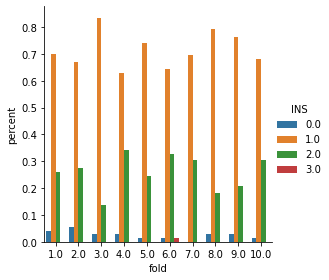

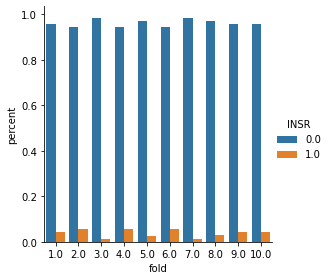

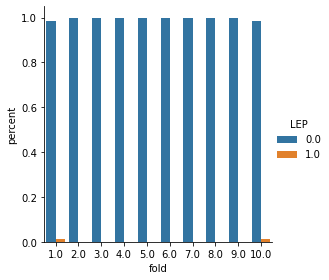

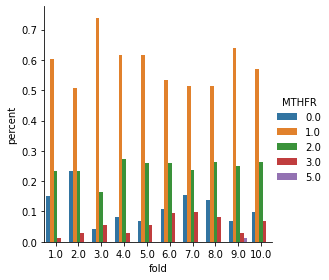

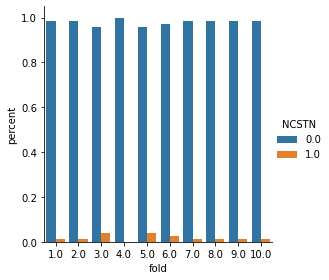

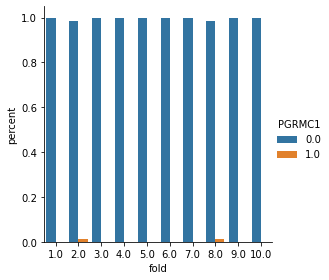

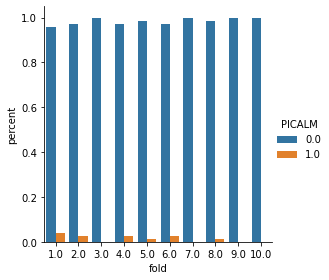

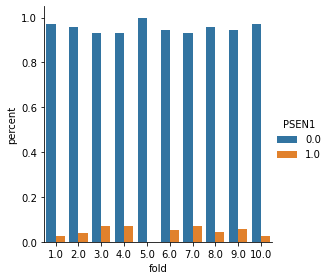

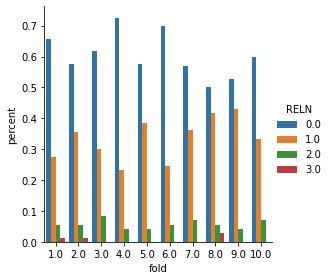

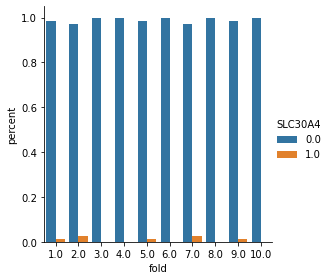

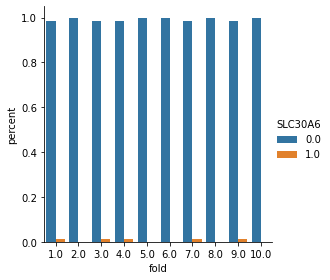

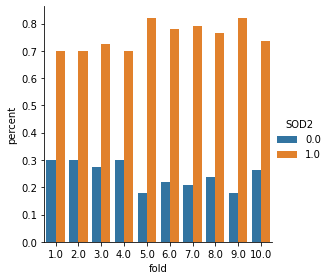

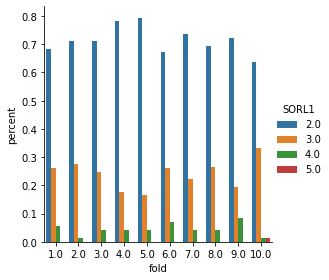

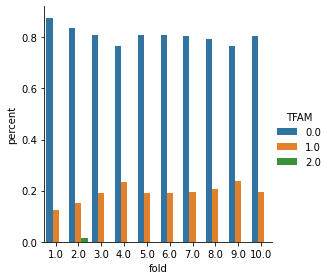

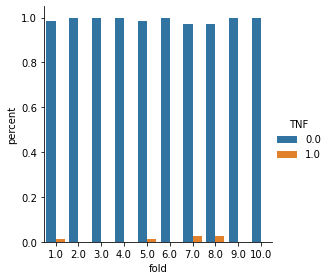

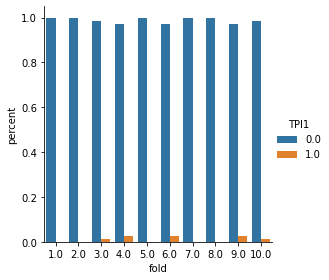

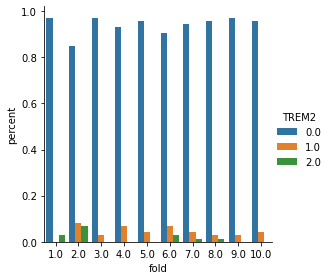

In [43]:
for gene in genes:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(data=data, x='fold', hue=gene)

    df1 = data.groupby('fold')[gene].value_counts(normalize=True)
    df1 = df1.rename('percent').reset_index()
    
    g = sns.catplot(x="fold", y='percent', hue=gene,
                    data=df1, kind="bar",
                    height=4, aspect=1)
#     plt.title(gene)
    plt.show()

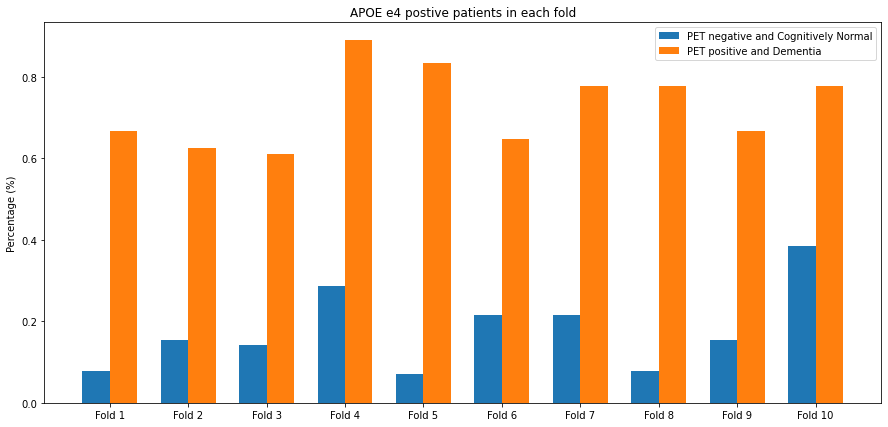

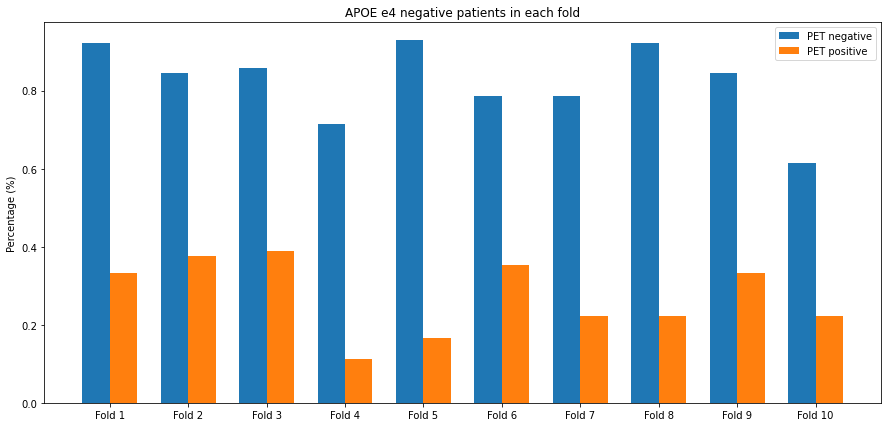

In [5]:
folds = []
percents1 = []
percents2 = []
for k in range(10):
    k+=1
    folds.append(f'Fold {k}')
    
    fold_data = pd.read_csv(f'data/splits/10Fold_CV_PETandDX/fold{k}_val_samples.csv', index_col=0)
    
    tmp1 = fold_data.loc[(fold_data['AV45+'] == 0)]
    count1 = tmp1['APOE4+'].value_counts()
    percent1 = count1[1] / tmp1.shape[0]

    tmp2 = fold_data.loc[(fold_data['AV45+'] == 1)]
    count2 = tmp2['APOE4+'].value_counts()
    percent2 = count2[1] / tmp2.shape[0]
    
    percents1.append(percent1)
    percents2.append(percent2)
    

x = np.arange(len(folds))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, percents1, width, label='PET negative and Cognitively Normal')
rects2 = ax.bar(x + width/2, percents2, width, label='PET positive and Dementia')
    
ax.set_ylabel('Percentage (%)')
ax.set_title('APOE e4 postive patients in each fold')
ax.set_xticks(x)
ax.set_xticklabels(folds)
ax.legend()



folds = []
percents1 = []
percents2 = []
for k in range(10):
    k+=1
    folds.append(f'Fold {k}')
    
    fold_data = pd.read_csv(f'data/splits/10Fold_CV_PETandDX/fold{k}_val_samples.csv', index_col=0)
    
    tmp1 = fold_data.loc[(fold_data['AV45+'] == 0)]
    count1 = tmp1['APOE4+'].value_counts()
    percent1 = count1[0] / tmp1.shape[0]

    tmp2 = fold_data.loc[(fold_data['AV45+'] == 1)]
    count2 = tmp2['APOE4+'].value_counts()
    percent2 = count2[0] / tmp2.shape[0]
    
    percents1.append(percent1)
    percents2.append(percent2)
    

x = np.arange(len(folds))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, percents1, width, label='PET negative')
rects2 = ax.bar(x + width/2, percents2, width, label='PET positive')
    
ax.set_ylabel('Percentage (%)')
ax.set_title('APOE e4 negative patients in each fold')
ax.set_xticks(x)
ax.set_xticklabels(folds)
ax.legend()

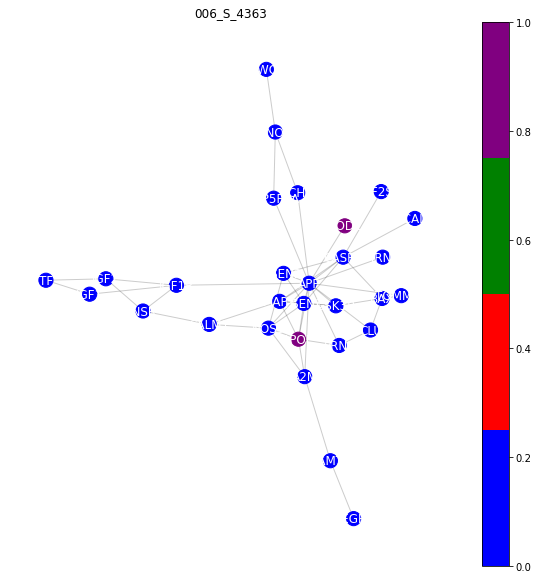

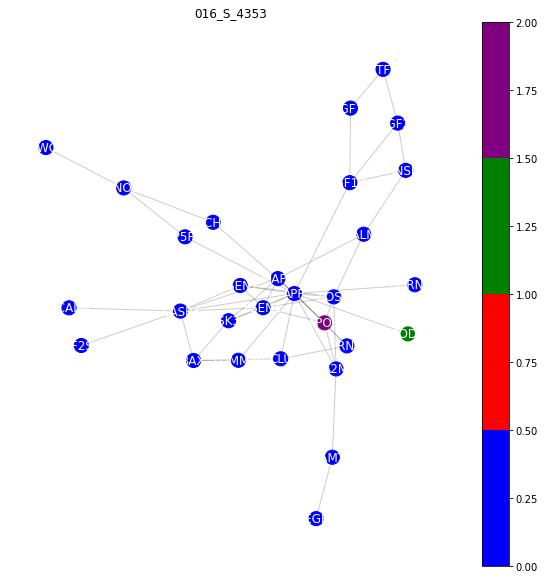

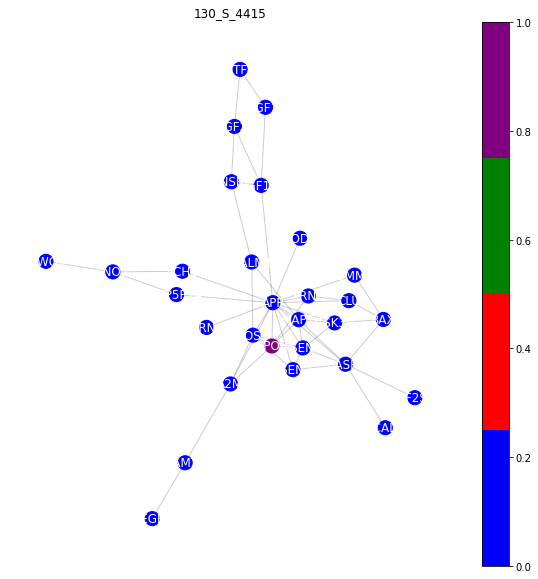

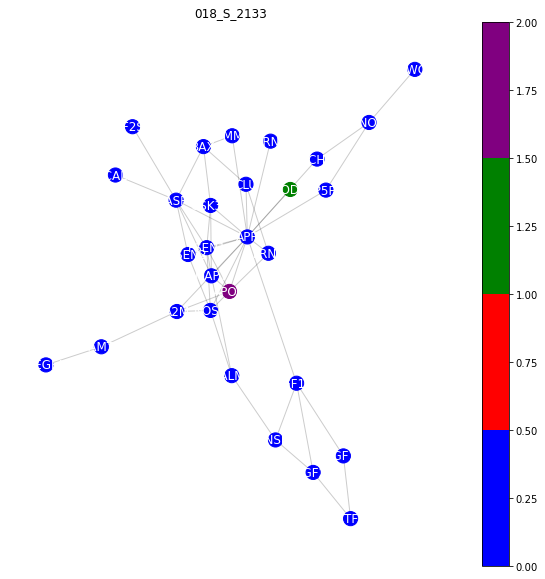

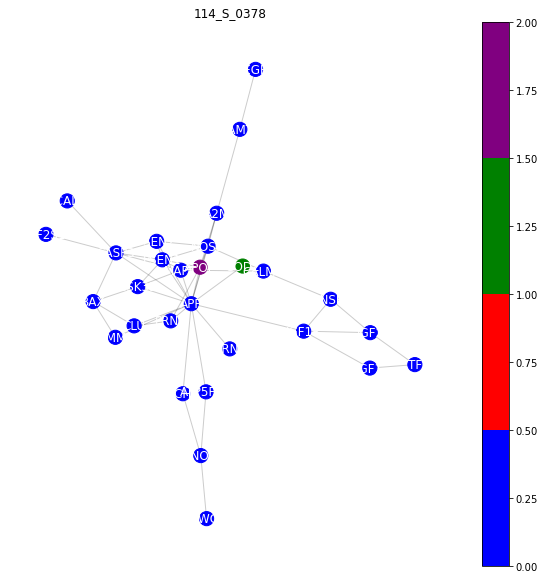

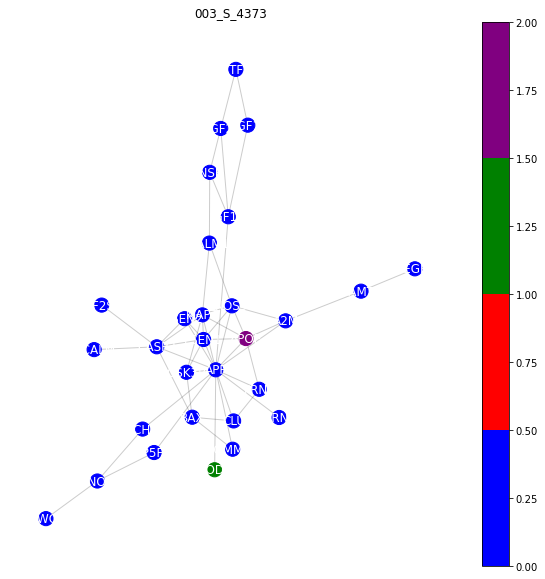

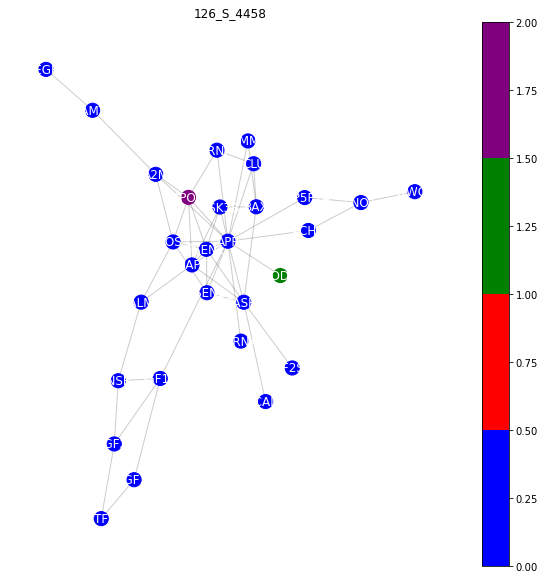

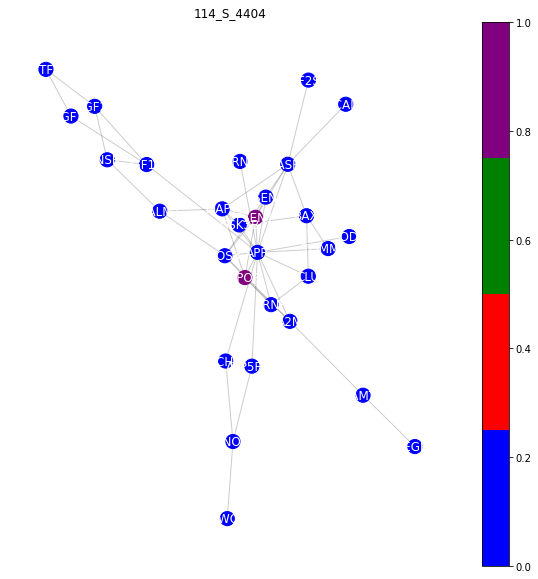

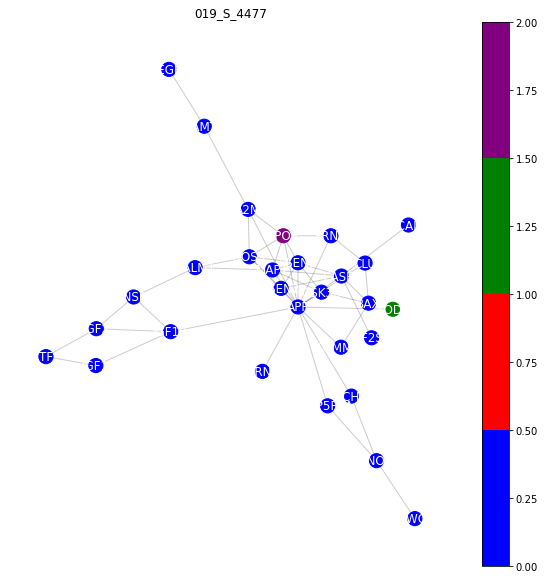

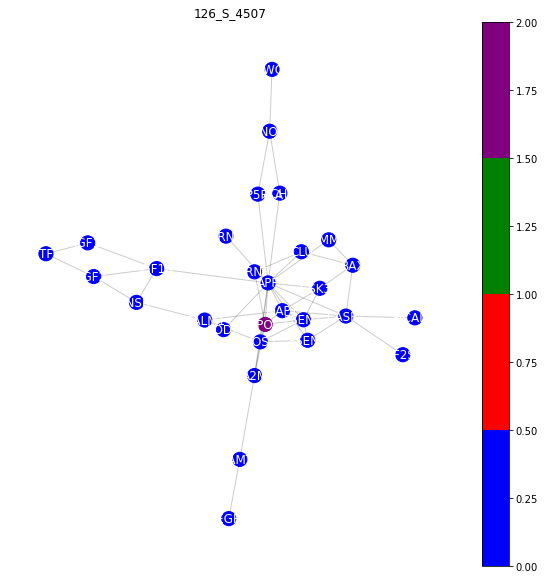

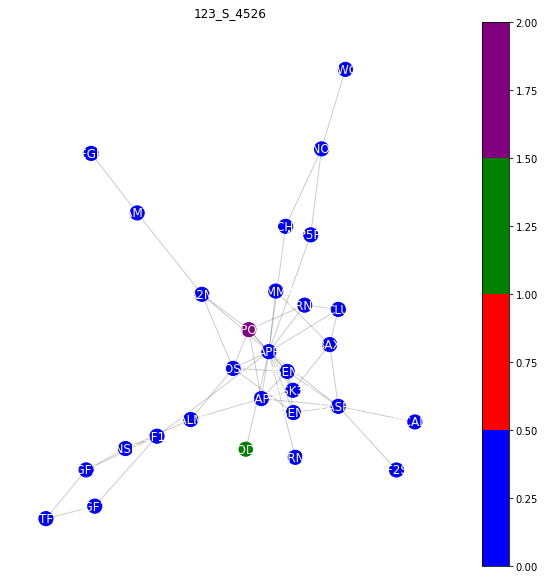

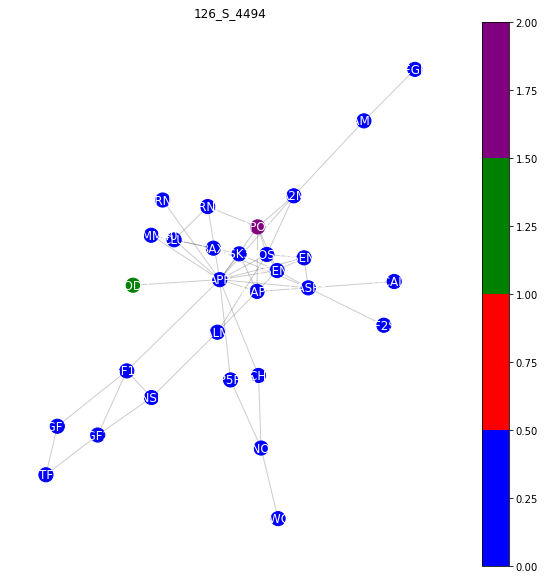

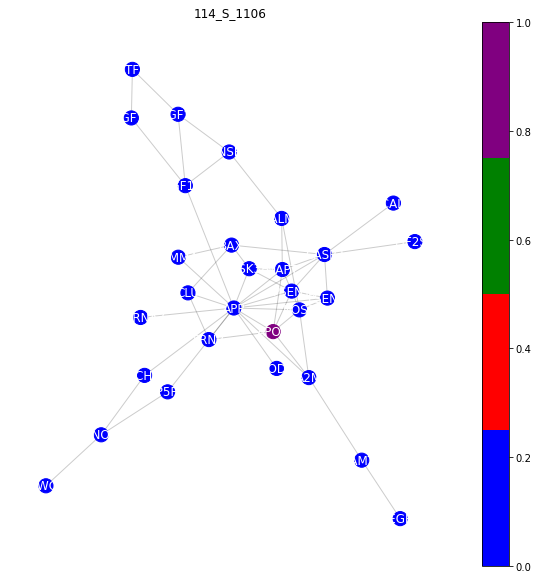

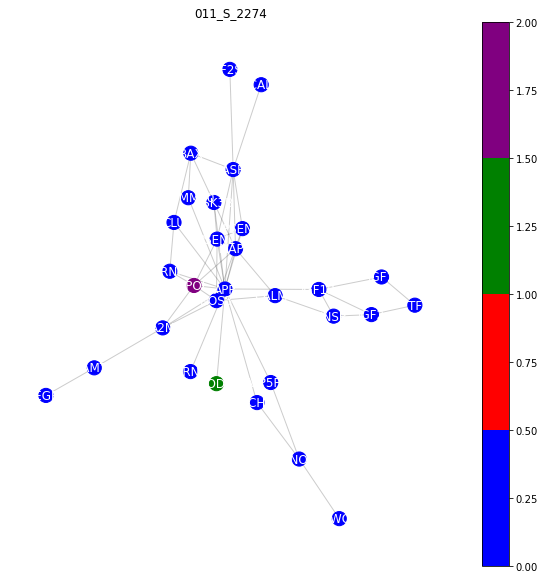

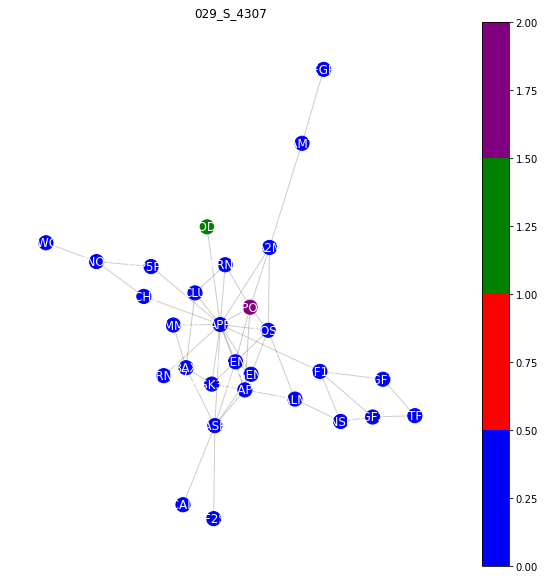

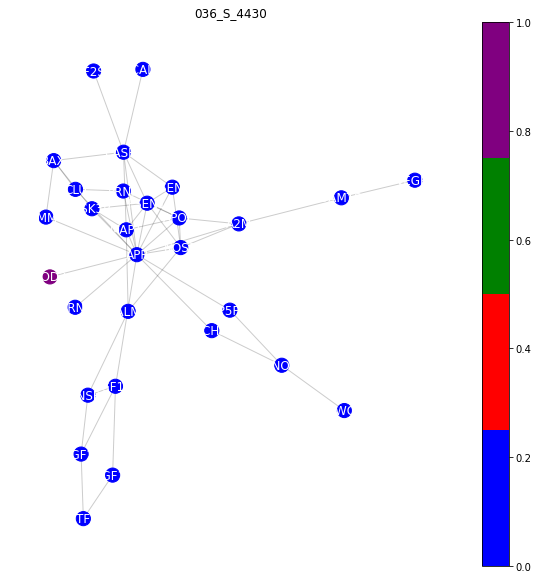

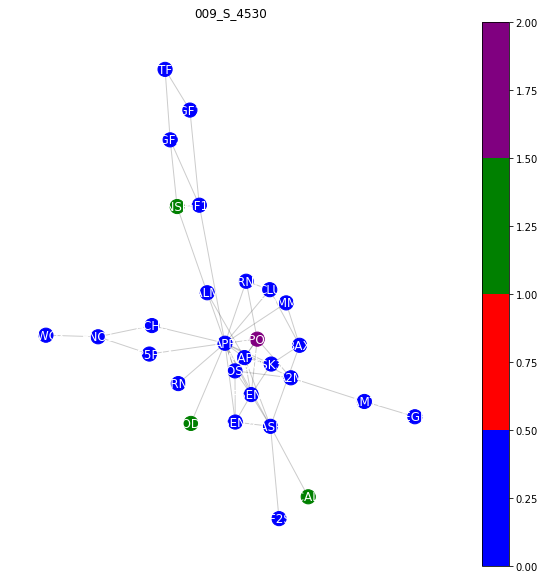

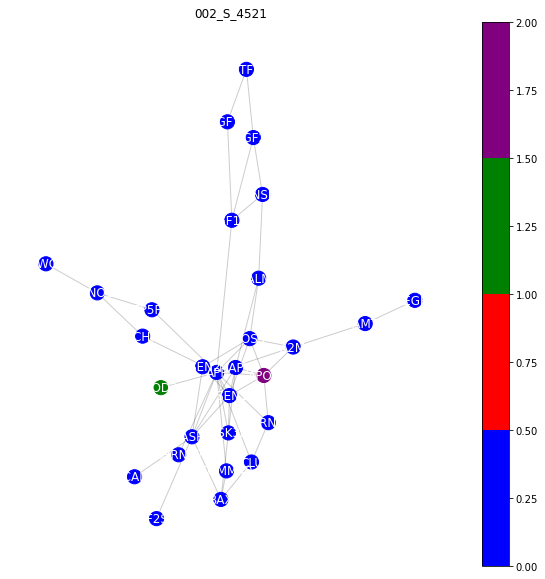

In [6]:
from matplotlib.colors import ListedColormap
# folds = []
# percents1 = []
# percents2 = []
# for k in range(1):
#     k+=1
    
fold_data = pd.read_csv(f'data/splits/10Fold_CV_PETandDX/fold8_val_samples.csv', index_col=0)
samples = list(fold_data.index)

with open('data/graph_datasets/PETandDX/AD_PPI_snap_brain_missense.pkl', 'rb') as f:
    graphs = pickle.load(f)

dfs = []
for g in graphs:
    G = nx.Graph(g)
#         print(G.graph)
    if str(G.graph['sampleID']) in samples:
        if int(G.graph['graph_label']) == 1:
            
#             data = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='columns')
#             dfs.append(data)
# d = pd.concat(dfs, axis=0)
# b = d.astype(int)
# b = b.loc[:, (b != 0).any(axis=0)]
# b

            
            # create number for each group to allow use of colormap

            # get unique groups
#             groups = [int(v) for v in nx.get_node_attributes(g,'node_attr').values()]
            groups = set([0, 1, 2, 3])
#             print(groups)
            mapping = dict(zip(sorted(groups),count()))
#             print(mapping)
            nodes = G.nodes()
            colors = [mapping[int(G.nodes[n]['node_attr'])] for n in nodes]
#             print(colors)
            cmp = ListedColormap(['blue', 'red', 'green', 'purple'])
            # drawing nodes and edges separately so we can capture collection for colobar
            plt.figure(figsize=(10, 10))
            pos = nx.spring_layout(g)
            ec = nx.draw_networkx_edges(g, pos, alpha=0.2)
            nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=200, cmap=cmp)
            la = nx.draw_networkx_labels(g, pos=pos, font_color='white')
            plt.colorbar(nc)
            plt.axis('off')
            plt.title(G.graph['sampleID'])
            plt.show()

#             nodes_remove = []
#             for node in G.nodes(data=True):
#                 attr = int(node[1]['node_attr'])
#                 if attr == 0:
#                     nodes_remove.append(node[0])
#             G.remove_nodes_from(nodes_remove)

#             plt.figure(figsize=(2, 2))
#             nx.draw(G, with_labels=True, node_size=800, font_color='white')
#             plt.title(G.graph['sampleID'])
#             plt.show()
    
    